<a href="https://colab.research.google.com/github/walidbrini/TensorFlow/blob/main/TFtuto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf

In [ ]:
print(tf.version.VERSION)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

2.8.2
Found GPU at: /device:GPU:0


In [ ]:
!gsutil cat gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/train_set.csv | head -20

gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/754296579_30a9ae018c_n.jpg,daisy
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/18089878729_907ed2c7cd_m.jpg,dandelion
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/284497199_93a01f48f6.jpg,dandelion
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/3554992110_81d8c9b0bd_m.jpg,dandelion
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/4065883015_4bb6010cb7_n.jpg,daisy
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/roses/7420699022_60fa574524_m.jpg,roses
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/4558536575_d43a611bd4_n.jpg,dandelion
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/7568630428_8cf0fc16ff_n.jpg,daisy
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/7064813645_f7f48fb527.jpg,tulips
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/sunflowers/4933229095

In [ ]:
#Read and decode image 
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3
def read_and_decode(filename, reshape_dims):
 # 1. Read the file.
 img = tf.io.read_file(filename)
 # 2. Convert the compressed string to a 3D uint8 tensor.
 img = tf.image.decode_jpeg(img, channels=3)
 # 3. Convert 3D uint8 to floats in the [0,1] range.
 img = tf.image.convert_image_dtype(img, tf.float32)
 # 4. Resize the image to the desired size.
 return tf.image.resize(img, reshape_dims)

In [ ]:
def show_image(filename):
 img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
 plt.imshow(img.numpy())


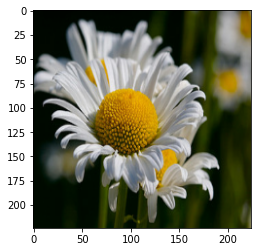

In [ ]:
#ImShow 
show_image("gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/754296579_30a9ae018c_n.jpg")

In [ ]:
tf.io.gfile.glob("gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/*")

['gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/LICENSE.txt',
 'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/README.txt',
 'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/all_data.csv',
 'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy',
 'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy.zip',
 'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion',
 'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion.zip',
 'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dict.txt',
 'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/eval_set.csv',
 'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/flowers_200_csv.zip',
 'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/flowers_200_folders.zip',
 'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/flowers_200_presplit.zip',
 'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/flowers_200_unla

In [ ]:
tf.strings.regex_replace(
                 tf.io.gfile.glob("gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/*"),
                 "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/", "")

<tf.Tensor: shape=(23,), dtype=string, numpy=
array([b'LICENSE.txt', b'README.txt', b'all_data.csv', b'daisy',
       b'daisy.zip', b'dandelion', b'dandelion.zip', b'dict.txt',
       b'eval_set.csv', b'flowers_200_csv.zip',
       b'flowers_200_folders.zip', b'flowers_200_presplit.zip',
       b'flowers_200_unlabeled.zip', b'flowers_full_with_csv.zip',
       b'inception_v3_2016_08_28.ckpt', b'open_image_inception_v3.ckpt',
       b'roses', b'roses.zip', b'sunflowers', b'sunflowers.zip',
       b'train_set.csv', b'tulips', b'tulips.zip'], dtype=object)>

In [ ]:
#Find classes
CLASS_NAMES = [item.numpy().decode("utf-8") for item in 
               tf.strings.regex_replace(
                 tf.io.gfile.glob("gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/*"),
                 "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/", "")]
CLASS_NAMES = [item for item in CLASS_NAMES if item.find(".") == -1]
print("These are the available classes:", CLASS_NAMES)

These are the available classes: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


<class 'list'>


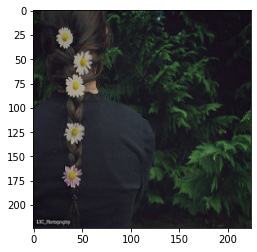

In [ ]:
#Take a look at a few tulips 
daisy = tf.io.gfile.glob("gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/*") 
print(type(daisy))
for i in range(5)  : 
  show_image(daisy[i])

gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/100930342_92e8746431_n.jpg
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/10094729603_eeca3f2cb6.jpg
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/10094731133_94a942463c.jpg
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/10128546863_8de70c610d.jpg
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/10163955604_ae0b830975_n.jpg


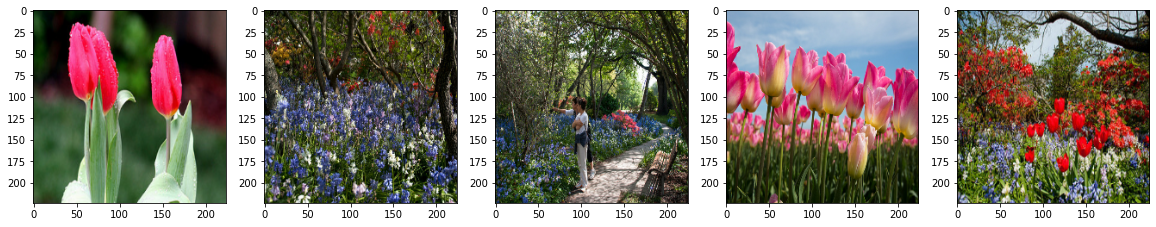

In [ ]:
tulips = tf.io.gfile.glob("gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/*.jpg")
f, ax = plt.subplots(1, 5, figsize=(20,20))
for idx, filename in enumerate(tulips[:5]):
  print(filename)
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  ax[idx].imshow((img.numpy()));


In [ ]:
dataset = tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/train_set.csv")

In [ ]:
def parse_csvline(csv_row):
  record_defaults = ["path", "flower"]
  filename, label = tf.io.decode_csv(csv_row, record_defaults)
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  return img, label 


In [ ]:
dataset = (tf.data.TextLineDataset(
 "gs://cloud-ml-data/img/flower_photos/train_set.csv").
 map(parse_csvline))

In [ ]:
for img, label in dataset.take(3):
 avg = tf.math.reduce_mean(img, axis=[0, 1])
 print(label, avg)

tf.Tensor(b'daisy', shape=(), dtype=string) tf.Tensor([0.3588961  0.36257887 0.26933077], shape=(3,), dtype=float32)
tf.Tensor(b'dandelion', shape=(), dtype=string) tf.Tensor([0.32278517 0.32278517 0.32278517], shape=(3,), dtype=float32)
tf.Tensor(b'dandelion', shape=(), dtype=string) tf.Tensor([0.20397592 0.13298093 0.07217225], shape=(3,), dtype=float32)


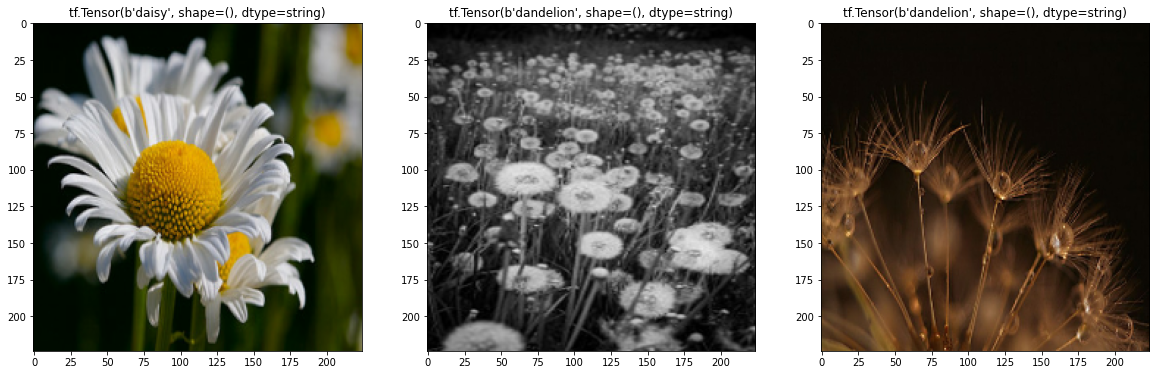

In [ ]:
Ndataset = dataset.take(3)
list(Ndataset.as_numpy_iterator())
x = 0
f, ax = plt.subplots(1, 3, figsize=(20,20))

for img,label in Ndataset  :
  ax[x].imshow(img)
  ax[x].set_title(label) 
  x = x+1
  

In [17]:
def decode_csv(csv_row):
  record_defaults = ["path", "flower"]
  filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  label = tf.argmax(tf.math.equal(CLASS_NAMES, label_string))
  return img, label


Create Trainning DataSet 

In [46]:
train_dataset = (tf.data.TextLineDataset("gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/train_set.csv").map(decode_csv).batch(10))

#for element in train_dataset.as_numpy_iterator():
#  plt.imshow(element[0][0])

Create Trainning EvalSet

In [47]:
eval_dataset = (tf.data.TextLineDataset("gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/eval_set.csv").map(decode_csv).batch(10))

Create a LinearModel

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    tf.keras.layers.Dense(len(CLASS_NAMES),activation = 'softmax')
])

model.compile(optimizer= 'adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])